# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования** - установить параметры, влияющие на рыночную стоимость объектов недвижимости.

**Исходные данные** - данные сервиса «Яндекс.Недвижимост (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).

**План:**

- Изучить данные
- Выполнить предобработку даных (почистить пропуски, дубликаты, поправить тип данных
- Добавить новые вычисления в датасет для анализа
- Проведите исследовательский анализ данных (поработать с выбросами, найти ответы на поставленные вопросы)

**Необходимо узнать:**

- Определить сколько времени занимает продажа квартиры. Когда продажу можно назвать быстрой / долгой
- Определить факторы, которые больше всего влияют на общую (полную) стоимость объекта.
- Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
- Вычислить среднюю стоимость квартиры в Санкт-Петербурге на разном удалении от центра

### Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#читаем данные и сохранаем их в переменную
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#выводим первые 5 строк
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#выводим последние 5 строк
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#общая информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

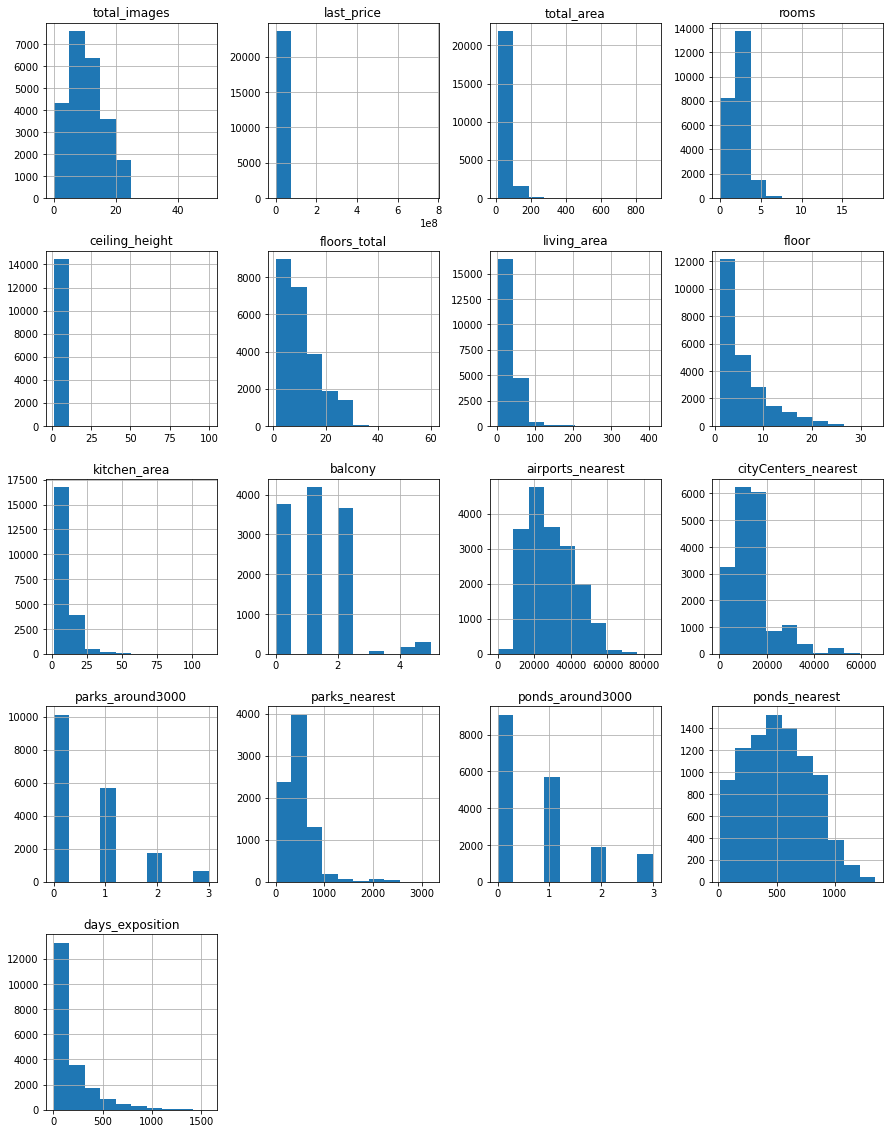

In [6]:
#распределение данных
data.hist(figsize=(15, 20))

In [7]:
#определение доли пропусков
(data.isna().mean()*100).sort_values()

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

In [8]:
#определение количества дубликатов
data.duplicated().sum()

0

**Вывод:** При первом ознакомлении с данными видно, что в 12 из 22 столбцах имеется большое количество пропусков, в столбцах `is_apartment`, `parks_nearest`, `parks_nearest` больше половины пропусков. Столбец `cityCenters_nearest` необходимо переименовать, так как нарушен синтаксис наименования столбцов. Так же видно, что у части столбцов нужно изменить тип данных (например у `locality_name`)


### Выполните предобработку данных

Для начала обработаем пропуски. Изучим все столбцы, в которых имеются пропуски и решим, что с ними можно сделать(оставить, заменить или удалить вообще). Gосмотрим на тип данных каждого столбца и поменяем его при необходимости. так же поработаем с неявными дубликатами в столбцах с названиями.

#### Исследование столбца `ceiling_height`

In [9]:
#Статистический анализ
print(data['ceiling_height'].describe())
print('Процент пропусков:', (data['ceiling_height'].isna().mean()*100).round(2), '%')

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
Процент пропусков: 38.8 %


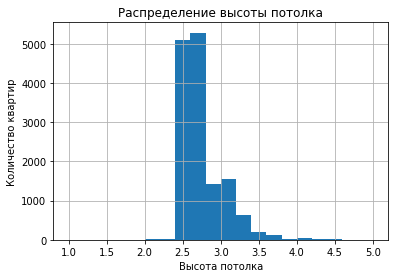

In [10]:
#посмотрим на распределение данных
data.hist(column=['ceiling_height'], range=(1, 5), bins=20)
plt.title('Распределение высоты потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `ceiling_height` **38.8%** пропусков. На диаграмме видно, что данные скошены вправо. Средняя (2,77) не сильно отличается от медианы (2,65), но все же отличается по причине скошенности данных. Поэтому эта разница не должна сильно отразиться на финальных выводах о влиянии высоты потолка на стоимость, но все же целесообрано заменить пропуски медианным значением, так как данные все же немного скошены. Тип данных верный, его оставляем.

In [11]:
#заполняем пропуски
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

#### Исследование столбца `floors_total`

In [12]:
#Статистический анализ
print(data['floors_total'].describe())
print('Процент пропусков:', (data['floors_total'].isna().mean()*100).round(2), '%')

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
Процент пропусков: 0.36 %


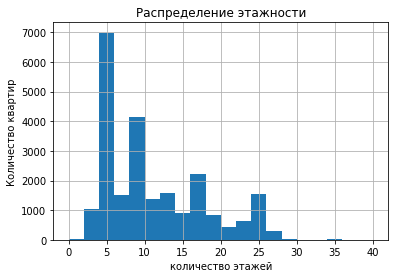

In [13]:
#посмотрим на распределение данных
data.hist(column=['floors_total'], range=(0, 40), bins=20)
plt.title('Распределение этажности')
plt.xlabel('количество этажей')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `floors_total` очень мало (**0.36%**) пропусков. На диаграмме видно, что  данные скошены вправо. Средняя (10,67) отличается от медианы (9).Стандартное отклонение тоже для этажности велико (6,59). Для заполнения пропусков целесообразно использовать медиану, но тогда у некоторых квартир этаж получится больше, чем квартир в доме. Сделаем предположение, что это одноэтажные дома, поэтому данные не заполнены и заполним пропуски 0.


In [14]:
a = data[['floor','floors_total']].sort_values(by='floors_total', ascending=True)
a = a[a['floors_total'].isna()]
a['floors_total'] = a['floors_total'].fillna(1)
a = a.pivot_table(index='floor', aggfunc='count').reset_index()
a.columns=['floor', 'count']
a

,floor,count
0,1,3
1,2,2
2,3,4
3,4,10
4,5,4
5,6,9
6,7,4
7,8,8
8,9,5
9,10,3


<div class="alert alert-info"> Предположение о том, что пропуски - это одноэтажные дома, не подтвердилась. Более того, пропуски распределены практически равномерно на этажности от 1 до 24. Так как пропусков очень мало (<b>0.36%</b>) и они ни на что не повлияют, мы удалим строки с пропусками. </div>

In [15]:
data = data.dropna(subset = ['floors_total'])
data['floors_total'].isna().sum()

0

#### Исследование столбца `living_area`

In [16]:
#Статистический анализ
print(data['living_area'].describe())
print('Процент пропусков:', (data['living_area'].isna().mean()*100).round(2), '%')

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64
Процент пропусков: 7.92 %


In [17]:
# смотрим, как меняютмя средняя и медиана в зависимости от количества комнат
mean_living_area = pd.pivot_table(data, index='rooms', values='living_area', aggfunc=['mean', 'median'])
mean_living_area

,mean,median
,living_area,living_area
rooms,,
0,18.865246,18.000
1,17.900308,17.600
2,31.736574,30.500
3,47.384711,45.000
4,66.936136,63.500
5,100.009247,91.785
6,131.799796,124.400
7,163.564151,145.000


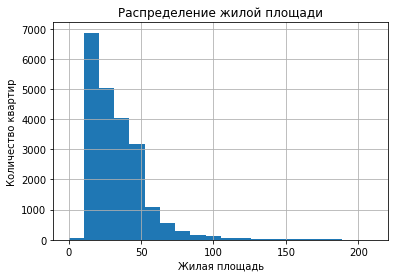

In [18]:
#посмотрим на распределение данных
data.hist(column=['living_area'], range=(0, 210), bins=20)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `living_area` мало (**8.03 %**) пропусков. На диаграмме видно, что  данные скошены вправо. Средняя (34.45) отличается от медианы (30) незначительно. Для заполнения пропусков целесообразно использовать медиану, так как распределение имеет очень большой, но тонкий скос вправо. Однако, очевидно, что для квартир с разным количеством комнат будет разная средняя жилая площадь. Хоть и количество попусков небольшое, мы все же произвели замену пропусков в зависимости от количества комнат, для того, чтобы не искажать итоговые выводы. Тип данных нас устраивает - оставляем.

In [19]:
#сначала заполним пропуски там, где известны общая площадь и площадь кухни.
import warnings
for i in data['living_area']:
    data.loc[(data['living_area'].isna()) & (data['rooms'] != 0), 'living_area'] = \
    (data['total_area'] - data['kitchen_area'])
    warnings.filterwarnings("ignore")
data['living_area'].isna().sum()

1431

из 1903 пропусков у нас осталось 1464

In [20]:
# остальные пропуски заполняем: на каждом шаге цикла с помощью атрибута loc выбираем строки, 
# в которых в rooms текущее количество комнат (i) и есть пропуски в living_area

for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()) & (data['rooms'] != 0), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()
data['living_area'].isna().sum()

11

In [21]:
data.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    194
living_area      11
dtype: int64

**Вывод:** Осталось 1464 пропусков из 1903. Из них 14 пропусков - это студии, делить на жилую площадь и кухню нет смысла. Остальные пропуски оставляем, так как при замене из на медианное значение плошадь кухни и жилая площадь в сумме могут бы больше фактической общей площади. Оставшиеся пропуски заполняем 0.

In [22]:
#заполняем пропуски 0
data['living_area'] = data['living_area'].fillna(0)

In [23]:
df = data[['kitchen_area', 'living_area', 'total_area']]
df['kitchen_area'].fillna(0)
df['living_area'].fillna(0)
df['total_area'].fillna(0)
df['total_new'] = df['kitchen_area'] + df['living_area']
df.query('total_area < total_new')

,kitchen_area,living_area,total_area,total_new
184,6.20,26.10,30.20,32.30
545,5.00,20.00,23.80,25.00
551,9.28,30.55,31.59,39.83
601,7.00,48.30,53.70,55.30
696,23.43,23.43,34.69,46.86
...,...,...,...,...
21824,8.60,38.00,44.00,46.60
21868,8.00,30.60,34.30,38.60
21915,32.40,62.00,91.40,94.40
21956,8.00,44.00,46.00,52.00


#### Исследование столбца `is_apartment`

In [24]:
#Статистический анализ
print(data['is_apartment'].describe())


count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object


In [25]:
print('Процент пропусков:', (data['is_apartment'].isna().mean()*100).round(2), '%')
data['is_apartment'].value_counts()

Процент пропусков: 88.25 %


False    2725
True       50
Name: is_apartment, dtype: int64

**Вывод** Видим, что в столбце `is_apartment` очень много пропусков (**88.29 %**). При этом из заполненных значений почти все квартиры имеют признак False (2725 шт.), а True всего 50 шт.
Анализировать влияние данного признака на стоимость недвижимости нецелесообразно, так как очень мало заполненных данных. Удаляем данный столбец, так как он не несет никакой полезной информации.

In [26]:
#удаляем столбец
data = data.drop('is_apartment', axis=1)
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

#### Исследование столбца `kitchen_area`

In [27]:
#Статистический анализ
print(data['kitchen_area'].describe())
print('Процент пропусков:', (data['kitchen_area'].isna().mean()*100).round(2), '%')

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64
Процент пропусков: 9.45 %


In [28]:
# смотрим, как меняютмя средняя и медиана в зависимости от количества комнат
mean_kitchen_area = pd.pivot_table(data, index='rooms', values='kitchen_area', aggfunc=['mean', 'median'])
mean_kitchen_area

,mean,median
,kitchen_area,kitchen_area
rooms,,
1,9.548692,9.00
2,9.974912,8.70
3,11.293906,9.50
4,13.663009,11.05
5,18.367649,15.10
6,21.098229,19.75
7,21.998077,20.00
8,24.866667,25.00


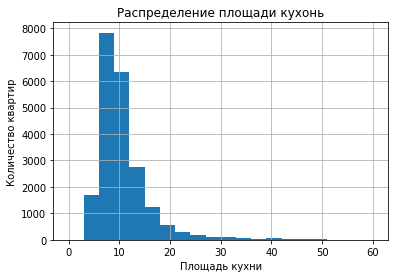

In [29]:
#посмотрим на распределение данных
data.hist(column=['kitchen_area'], range=(0, 60), bins=20)
plt.title('Распределение площади кухонь')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `kitchen_area` мало (**9.61 %**) пропусков. На диаграмме видно, что  данные скошены вправо. Средняя (10.56) отличается от медианы (9.1). Для заполнения пропусков целесообразно использовать медиану, так как распределение имеет очень большой, но тонкий скос вправо. Однако, мы видим, что для квартир с разным количеством комнат будет разная средняя жилая площадь. Хоть и количество попусков небольшое, мы все же произвели замену пропусков в зависимости от количества комнат, для того, чтобы не искажать итоговые выводы. 
Тип данных нас устраивает - оставляем.

In [30]:
#заполняем пропуски: на каждом шаге цикла с помощью атрибута loc выбираем строки, 
# в которых в rooms текущее количество комнат (i) и есть пропуски в kitchen_area
import warnings
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()) &  (data['rooms'] != 0), 'kitchen_area'] =\
    (data['total_area'] - data['living_area'])
    warnings.filterwarnings("ignore")
data['kitchen_area'].isna().sum()

194

In [31]:
data.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    194
living_area       0
dtype: int64

In [32]:
#заполняем пропуски 0
data['kitchen_area'] = data['kitchen_area'].fillna(0)

**Вывод:** Осталось 197 пропусков - это студии, делить на жилую площадь и кухню нет смысла. Остальные пропуски заполняем 0.

#### Исследование столбца `balcony`

In [33]:
#Статистический анализ
print(data['balcony'].describe())
print('Процент пропусков:', (data['balcony'].isna().mean()*100).round(2), '%')
data['balcony'].value_counts()

count    12133.000000
mean         1.154208
std          1.071022
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64
Процент пропусков: 48.62 %


1.0    4195
0.0    3713
2.0    3657
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

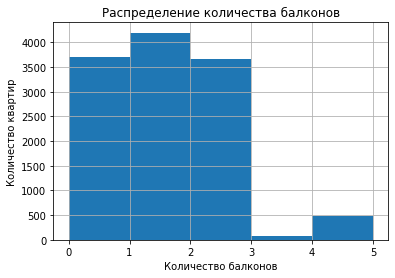

In [34]:
#посмотрим на распределение данных
data.hist(column=['balcony'], range=(0, 5), bins=5)
plt.title('Распределение количества балконов')
plt.xlabel('Количество балконов')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `balcony` половина из всех данных (**48.61 %**) это пропуски. На диаграмме видно, что  данные немного скошены вправо. Но средняя и медиана можно сказать равны (=1).  Тип данных необходимо поменять на int, так как число балконов может быть только целым числом, а у нас тип данный float. 
Так как наш датасет - это данные из сервиса Яндекс Недвижимость (архив объявлений о продаже квартир), то можем предположить, что указание наличия балкона может сильно сказаться на стоимости квартиры, отсюда можно предположить, что пропуски - это отсутствие балкона, так как люди хотели бы удорожить свою недвижимость и указали бы такой важный момент. Возможно, это так же связано с тем, что наличие балконов не указывали в основнов владельцы домов.
Заполняем пропуски 0.

In [35]:
#заполняем пропуски и проверяем, остались ли они
data['balcony'] = data['balcony'].fillna(0).astype('int')
print(data['balcony'].value_counts())
print('Количество пропусков:', data['balcony'].isna().sum())

0    15193
1     4195
2     3657
5      304
4      183
3       81
Name: balcony, dtype: int64
Количество пропусков: 0


#### Исследование столбца `locality_name`

In [36]:
#Статистический анализ
print(data['locality_name'].describe())
print('Процент пропусков:', (data['locality_name'].isna().mean()*100).round(2), '%')
print('количество уникальных значений', len(data['locality_name'].unique()))

count               23565
unique                364
top       Санкт-Петербург
freq                15651
Name: locality_name, dtype: object
Процент пропусков: 0.2 %
количество уникальных значений 365


In [37]:
set(data['locality_name'].unique())

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'г

In [38]:
# Приведен написание слова 'поселок' и 'посёлок' и типы населенных пунктов к единому виду:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е').str.replace('поселок городского типа', 'поселок')
    .str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
    .str.replace('поселок станции', 'поселок')
    .str.replace('коттеджный поселок', 'поселок')
    .str.replace('городской поселок', 'поселок')
    .str.replace('поселок при железнодорожной станции', 'поселок').str.replace('садовое товарищество', 'поселок')
    .replace(['деревня Рябово'], 'поселок Рябово', regex=True)
)
print('количество уникальных значений', len(data['locality_name'].unique()))

количество уникальных значений 317


**Вывод** Видим, что в столбце `locality_name` крайне малый процент пропусков (0.21 %) . Пока оставим эти пропуски незаполненными, посмотрим на дальнейший анализ, возможно строки с пропусками просто удалим. 
Выполнена работа по чиске неявных дубликатов.Для этих целей изменили типы населенных пунктов (например 'поселок станции' поменяли на 'поселок'. До чистки было уникальных значений 365, стало 317. 

#### Исследование столбца `airports_nearest`

In [39]:
#Статистический анализ
print(data['airports_nearest'].describe())
print('Процент пропусков:', (data['airports_nearest'].isna().mean()*100).round(2), '%')

count    18081.000000
mean     28788.008185
std      12626.209956
min          0.000000
25%      18575.000000
50%      26726.000000
75%      37242.000000
max      84869.000000
Name: airports_nearest, dtype: float64
Процент пропусков: 23.43 %


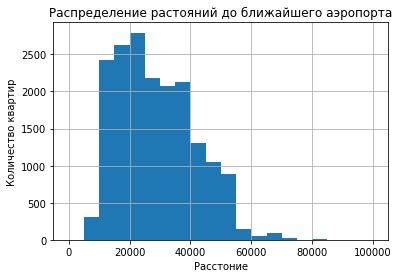

In [40]:
#посмотрим на распределение данных
data.hist(column=['airports_nearest'], range=(0, 100000), bins=20)
plt.title('Распределение растояний до ближайшего аэропорта')
plt.xlabel('Расстоние')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `airports_nearest` не мало (**23.38 %**) пропусков. На диаграмме видно, что  данные скошены вправо.  В условиях написано, что такие данные получены автоматически на основе картографических данных, то есть если имеется пропуск, то аэропортов поблизости нет. Пропуски оставляем. Тип данных нас устраивает - оставляем.

In [41]:
#заполняем пропуски
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
data['airports_nearest'].isna().sum()

0

#### Исследование столбца `cityCenters_nearest`

In [42]:
#Статистический анализ
print(data['cityCenters_nearest'].describe())
print('Процент пропусков:', (data['cityCenters_nearest'].isna().mean()*100).round(2), '%')

count    18104.000000
mean     14185.084015
std       8614.132292
min        181.000000
25%       9233.750000
50%      13093.000000
75%      16287.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64
Процент пропусков: 23.33 %


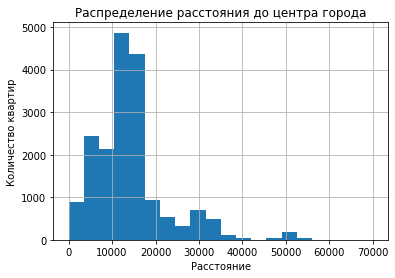

In [43]:
#посмотрим на распределение данных
data.hist(column=['cityCenters_nearest'], range=(0, 70000), bins=20)
plt.title('Распределение расстояния до центра города')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `cityCenters_nearest` не мало (**23.38 %**) пропусков. На диаграмме видно, что  данные скошены вправо. В условиях написано, что такие данные получены автоматически на основе картографических данных, то есть если имеется пропуск, то локация находится очень далеко от центра. Пропуски оставляем. Тип данных нас устраивает - оставляем.

In [44]:
#заполняем пропуски
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['cityCenters_nearest'].isna().sum()

0

#### Исследование столбца `parks_around3000`

In [45]:
#Статистический анализ
print(data['parks_around3000'].describe())
print('Процент пропусков:', (data['parks_around3000'].isna().mean()*100).round(2), '%')
data['parks_around3000'].value_counts()

count    18105.000000
mean         0.611433
std          0.802168
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64
Процент пропусков: 23.33 %


0.0    10064
1.0     5657
2.0     1739
3.0      645
Name: parks_around3000, dtype: int64

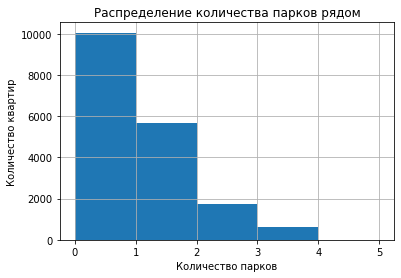

In [46]:
#посмотрим на распределение данных
data.hist(column=['parks_around3000'], range=(0, 5), bins=5)
plt.title('Распределение количества парков рядом')
plt.xlabel('Количество парков')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `parks_around3000` не мало (**23.28 %**) пропусков. На диаграмме видно, что  данные скошены вправо. В условиях написано, что такие данные получены автоматически на основе картографических данных, то есть если имеется пропуск, то парков поблизости нет. Пропуски заменяем на 0. Тип данных меняем на целое число.

In [47]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['parks_around3000'].isna().sum()

0

#### Исследование столбца `parks_nearest`

In [48]:
#Статистический анализ
print(data['parks_nearest'].describe())
print('Процент пропусков:', (data['parks_nearest'].isna().mean()*100).round(2), '%')

count    8045.000000
mean      490.554630
std       341.336698
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64
Процент пропусков: 65.93 %


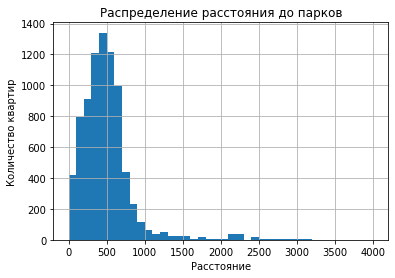

In [49]:
#посмотрим на распределение данных
data.hist(column=['parks_nearest'], range=(0, 4000), bins=40)
plt.title('Распределение расстояния до парков')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `parks_nearest` больше половины (**65.91 %**) пропусков. На диаграмме видно, что  данные скошены вправо. В условиях написано, что такие данные получены автоматически на основе картографических данных, то есть если имеется пропуск, то парков поблизости нет. Пропуски оставляем. Тип данных нас устраивает - оставляем.

#### Исследование столбца `ponds_around3000`

In [50]:
#Статистический анализ
print(data['ponds_around3000'].describe())
print('Процент пропусков:', (data['ponds_around3000'].isna().mean()*100).round(2), '%')
data['ponds_around3000'].value_counts()

count    18105.000000
mean         0.770119
std          0.939075
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64
Процент пропусков: 23.33 %


0.0    9044
1.0    5677
2.0    1886
3.0    1498
Name: ponds_around3000, dtype: int64

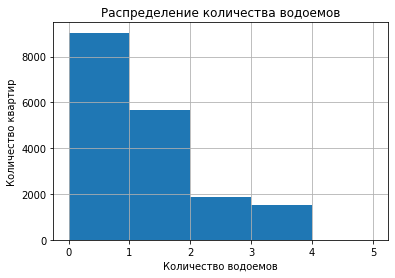

In [51]:
#посмотрим на распределение данных
data.hist(column=['ponds_around3000'], range=(0, 5), bins=5)
plt.title('Распределение количества водоемов')
plt.xlabel('Количество водоемов')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `ponds_around3000` не мало (**23.28 %**) пропусков. На диаграмме видно, что  данные скошены вправо. В условиях написано, что такие данные получены автоматически на основе картографических данных, то есть если имеется пропуск, то водоемов поблизости нет. Пропуски заменяем на 0. Тип данных меняем на целое число.

In [52]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
data['ponds_around3000'].isna().sum()

0

#### Исследование столбца `ponds_nearest`

In [53]:
#Статистический анализ
print(data['ponds_nearest'].describe())
print('Процент пропусков:', (data['ponds_nearest'].isna().mean()*100).round(2), '%')

count    9061.000000
mean      518.209469
std       277.887489
min        13.000000
25%       294.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64
Процент пропусков: 61.63 %


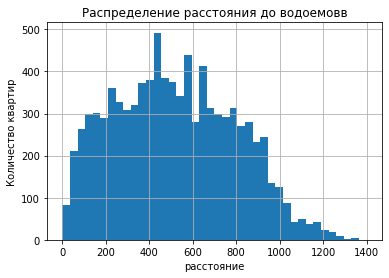

In [54]:
#посмотрим на распределение данных
data.hist(column=['ponds_nearest'], range=(0, 1400), bins=40)
plt.title('Распределение расстояния до водоемовв')
plt.xlabel('расстояние')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `ponds_nearest` больше половины (**61.56 %**) пропусков. На диаграмме видно, что  данные скошены вправо. В условиях написано, что такие данные получены автоматически на основе картографических данных, то есть если имеется пропуск, то водоемов поблизости нет. Пропуски оставляем. Тип данных нас устраивает - оставляем.

#### Исследование столбца `days_exposition`

In [55]:
#Статистический анализ
print(data['days_exposition'].describe())
print('Процент пропусков:', (data['days_exposition'].isna().mean()*100).round(2), '%')
print('Медиана = ', data['days_exposition'].median())

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
Процент пропусков: 13.43 %
Медиана =  95.0


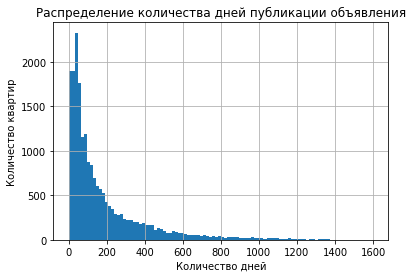

In [56]:
#посмотрим на распределение данных
data.hist(column=['days_exposition'], range=(0, 1600), bins=100)
plt.title('Распределение количества дней публикации объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

**Вывод** Видим, что в столбце `days_exposition` **13.42 %** пропусков. На диаграмме видно, что  данные скошены вправо. Средняя (180.88) отличается от медианы (95.0).Стандартное отклонение 219.72. Для заполнения пропусков целесообразно использовать медиану. Тип данных меняем на целое число.

In [57]:
#заполняем пропуски и проверяем, остались ли они
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()).astype(int)
data['days_exposition'].isna().sum()

0

#### Исследование столбца `first_day_exposition` 

In [58]:
#Статистический анализ
print(data['first_day_exposition'].describe())
print('Процент пропусков:', (data['first_day_exposition'].isna().mean()*100).round(2), '%')

count                   23613
unique                   1489
top       2018-02-01T00:00:00
freq                      366
Name: first_day_exposition, dtype: object
Процент пропусков: 0.0 %


**Вывод** пропусков в данных нет, но мы видим, что тип данных "object", необходимо поменять на "datetime" и привести к более читабельному формату (сейчас 2017-03-21T00:00:00)

In [59]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,114.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


### Добавьте в таблицу новые столбцы

In [60]:
# расчитаем цену одного квадратного метра
data['price_per_1m_square'] = (data['last_price'] / data['total_area']).round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1m_square
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00


In [61]:
# определим день недели публикации объявления (0 — понедельник, 1 — вторник и так далее), месяц публикации объявления, 
# год публикации объявления
data['week_day_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['month_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1m_square,week_day_of_exposition,month_of_exposition,year_of_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,95,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018


In [62]:
# определим тип этажа квартиры (значения — «первый», «последний», «другой»)
def floortype(floor):
    if floor['floor'] == 1:
        return 'первый'
    if floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
        
data['floor_type'] = data.apply(floortype, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1m_square,week_day_of_exposition,month_of_exposition,year_of_exposition,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,755.0,95,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,1,90.0,2,574.0,558,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,2,84.0,3,234.0,424,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,112.0,1,48.0,121,100000.00,1,6,2018,другой


In [63]:
# переведем расстояние до центра города из м в км и округлим до ближайших целых значений
data['cityCenters_nearest_km'] = ((data['cityCenters_nearest'] / 1000).round(0)).astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1m_square,week_day_of_exposition,month_of_exposition,year_of_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2,755.0,95,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0,NaN,81,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2,574.0,558,92785.71,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,84.0,3,234.0,424,408176.10,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1,48.0,121,100000.00,1,6,2018,другой,8


### Проведите исследовательский анализ данных

Изучим редкие и выбивающиеся значение 

#### Исследование столбца `total_area` 

In [64]:
#еще раз взглянем на статистическую информацию
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Гистограмма


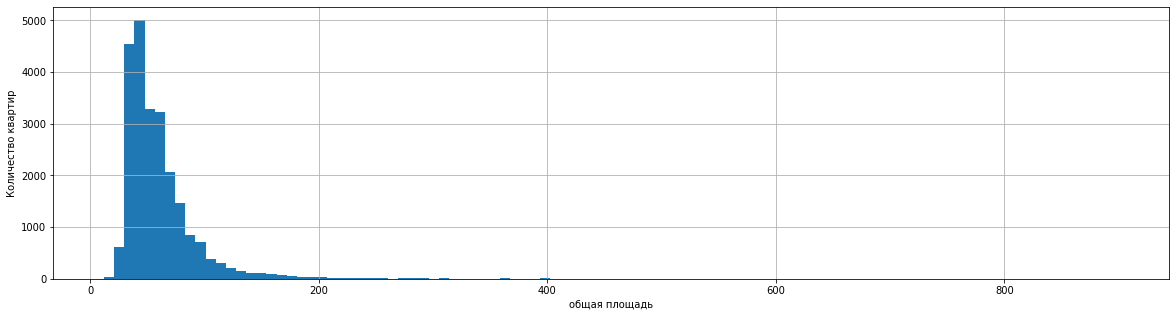

In [65]:
print('Гистограмма')
data['total_area'].hist(figsize=(20, 5), bins=100)
plt.xlabel('общая площадь')
plt.ylabel('Количество квартир')
plt.show()

Диаграмма размаха


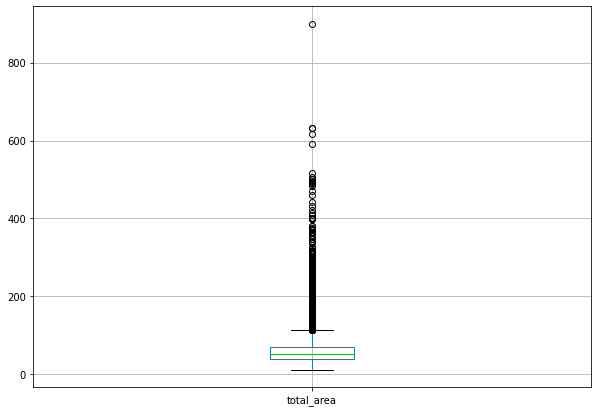

In [66]:
print('Диаграмма размаха')
data.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.xlabel('')
plt.show()

**Вывод** оставим в датафрейме для дальнейшего анализа недвижимость с площадью <= 200 кв.м.

In [67]:
final_df = data[data['total_area'] <= 200]

#### Исследование столбца `living_area` 

In [68]:
#living_area
final_df['living_area'].describe()

count    23387.000000
mean        33.517724
std         17.681602
min          0.000000
25%         18.500000
50%         30.200000
75%         42.500000
max        186.120000
Name: living_area, dtype: float64

Гистограмма


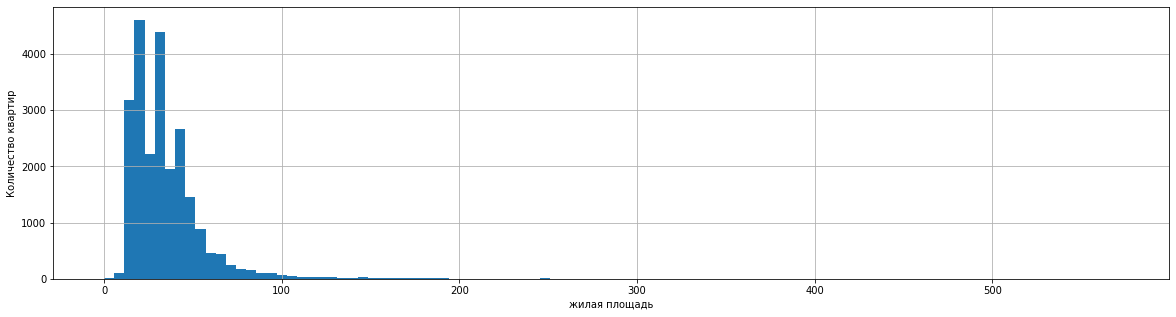

In [69]:
print('Гистограмма')
data['living_area'].hist(bins=100, figsize=(20, 5))
plt.xlabel('жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

Диаграмма размаха


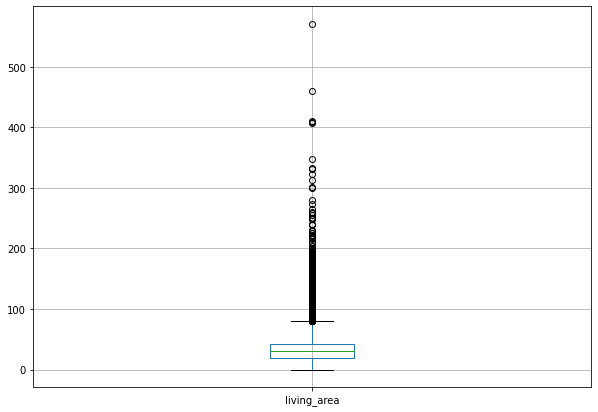

In [70]:
print('Диаграмма размаха')
data.boxplot(column=['living_area'], figsize=(10,7), grid=True)
plt.show()

**Вывод** оставим в датафрейме для дальнейшего анализа недвижимость с жилой площадью <= 100 кв.м.

In [71]:
final_df = data[data['living_area'] <= 100]

#### Исследование столбца `kitchen_area` 

In [72]:
#kitchen_area
data['kitchen_area'].describe()

count    23613.000000
mean        11.829802
std         10.958203
min        -45.500000
25%          7.100000
50%          9.600000
75%         12.900000
max        476.400000
Name: kitchen_area, dtype: float64

Гистограмма


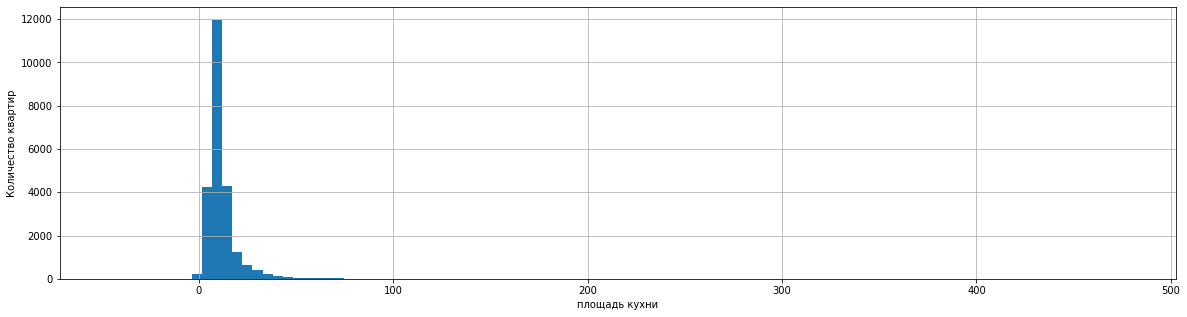

In [73]:
print('Гистограмма')
data['kitchen_area'].hist(bins=100, figsize=(20, 5))
plt.xlabel('площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

Диаграмма размаха


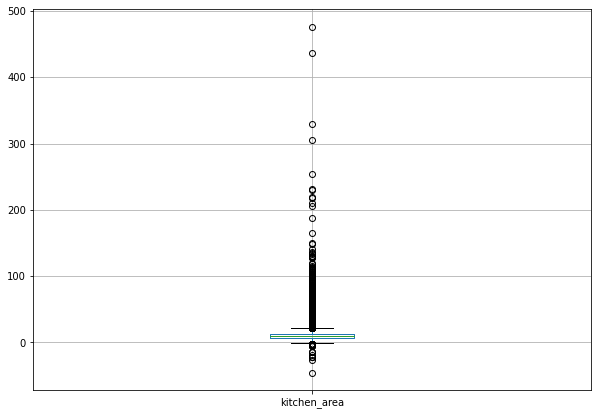

In [74]:
print('Диаграмма размаха')
data.boxplot(column=['kitchen_area'], figsize=(10,7), grid=True)
plt.show()

**Вывод** оставим в датафрейме для дальнейшего анализа недвижимость с жилой площадью <= 50 кв.м.

In [75]:
final_df = final_df.query('0 <= kitchen_area <= 50')

#### Исследование столбца `last_price` 

In [76]:
#last_price
final_df['last_price'] = final_df['last_price'] / 1000000
final_df['last_price'].describe()

count    23010.000000
mean         5.782701
std          5.605213
min          0.012190
25%          3.400000
50%          4.590000
75%          6.500000
max        330.000000
Name: last_price, dtype: float64

Гистограмма


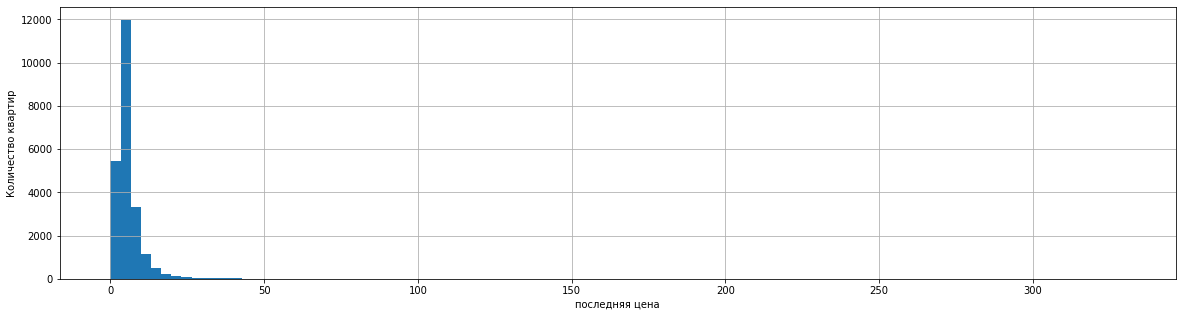

In [77]:
print('Гистограмма')
final_df['last_price'].hist(bins=100, figsize=(20, 5))
plt.xlabel('последняя цена')
plt.ylabel('Количество квартир')
plt.show()

Диаграмма размаха


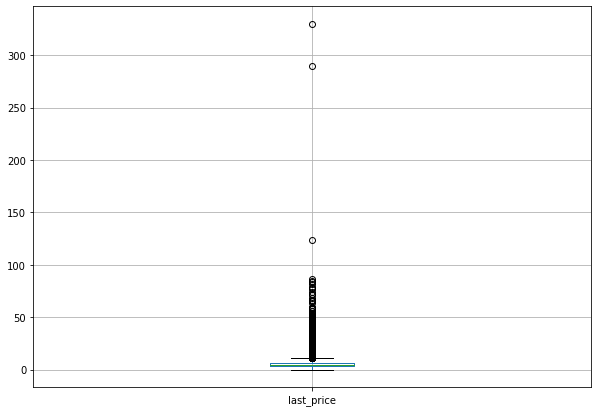

In [78]:
print('Диаграмма размаха')
final_df.boxplot(column=['last_price'], figsize=(10,7), grid=True)
plt.show()

**Вывод** оставим в датафрейме для дальнейшего анализа недвижимость ценой <= 20 000 000

In [79]:
final_df = final_df[final_df['last_price'] <= 20000000]

In [80]:
# поменяем тип данных на int для более легкого восприятия при дальнейшем анализе
final_df['last_price'] = final_df['last_price'].astype('int')

#### Исследование столбца `rooms` 

In [81]:
#rooms
final_df['rooms'].describe()

count    23010.000000
mean         2.003738
std          0.952469
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Гистограмма


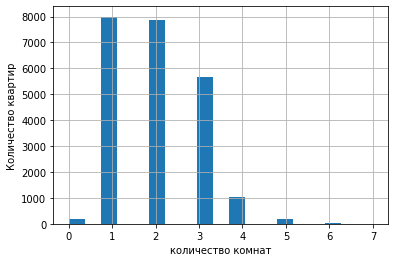

In [82]:
print('Гистограмма')
final_df['rooms'].hist(bins=19)
plt.xlabel('количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Диаграмма размаха


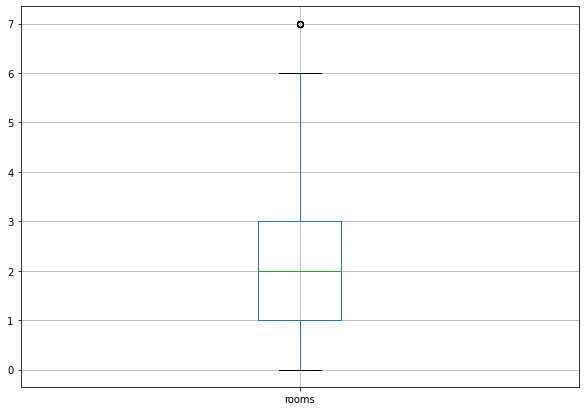

In [83]:
print('Диаграмма размаха')
final_df.boxplot(column=['rooms'], figsize=(10,7), grid=True)
plt.show()

**Вывод** оставим в датафрейме для дальнейшего анализа недвижимость с количеством комнат как есть. Здесь нас все устраивает.

#### Исследование столбца `ceiling_height` 

In [84]:
#ceiling_height
final_df['ceiling_height'].describe()

count    23010.000000
mean         2.716711
std          0.998819
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Гистограмма


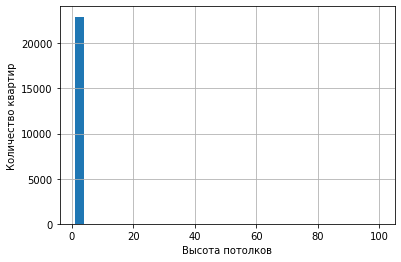

In [85]:
print('Гистограмма')
final_df['ceiling_height'].hist(bins=32)
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

Диаграмма размаха


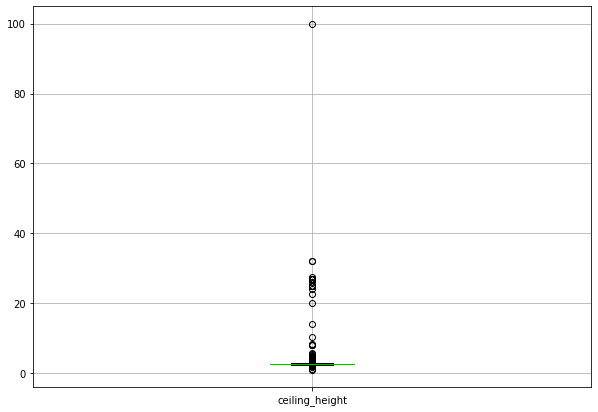

In [86]:
print('Диаграмма размаха')
final_df.boxplot(column=['ceiling_height'], figsize=(10,7), grid=True)
plt.show()

In [87]:
set(data['ceiling_height'].unique())

{1.0,
 1.2,
 1.75,
 2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,

In [88]:
len(final_df['ceiling_height'].unique())

168

In [89]:
final_df['ceiling_height'] = (
    final_df['ceiling_height']
    .replace(20.0, 2).replace(22.6, 2.26)
    .replace(24.0, 2.40)
    .replace(25.0, 2.50)
    .replace(26.0, 2.60)
    .replace(27.0, 2.70)
    .replace(27.5, 2.75).replace(32.0, 3.20, regex=True)
)
print('количество уникальных значений', len(final_df['ceiling_height'].unique()))

количество уникальных значений 161


In [90]:
final_df = final_df[final_df['ceiling_height'] <= 4]

Диаграмма размаха


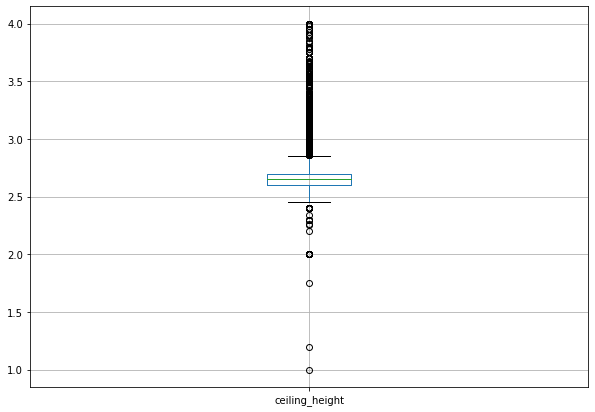

In [91]:
print('Диаграмма размаха')
final_df.boxplot(column=['ceiling_height'], figsize=(10,7), grid=True)
plt.show()

**Вывод** Как говорит нам гугл, в соответствии со стандартами, минимальная высота потолков в жилых комнатах должна быть не менее 2,5 метра, а для местностей (или, как их еще называют, климатических подрайонов) с более суровым климатом — не менее 2,7 м.
Оставим в датафрейме для дальнейшего анализа недвижимость с высотой потолков <= 2,85 м. и больше 2,5 м.

In [92]:
final_df = final_df.query('ceiling_height <= 2.85 and ceiling_height >= 2.5')

#### Исследование столбца `floor_type` 

In [93]:
#floor_type
final_df['floor_type'].describe()

count      20353
unique         3
top       другой
freq       15195
Name: floor_type, dtype: object

Гистограмма


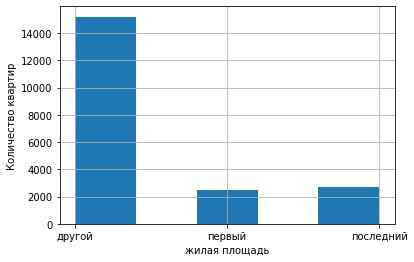

In [94]:
print('Гистограмма')
final_df['floor_type'].hist(bins=5)
plt.xlabel('жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

<AxesSubplot:ylabel='last_price'>

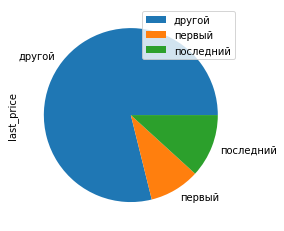

In [95]:
final_df.groupby(['floor_type']).sum().plot(kind='pie', y='last_price')

**Вывод** здесь все логично, ничего больше не меняем. Видно, что больше всего покупают квартиры в категории "другой", меньше всего на пером этаже, чуть больше на последнем

#### Исследование столбца `floors_total` 

In [96]:
#floors_total
final_df['floors_total'].describe()

count    20353.000000
mean        11.243257
std          6.673544
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

Гистограмма


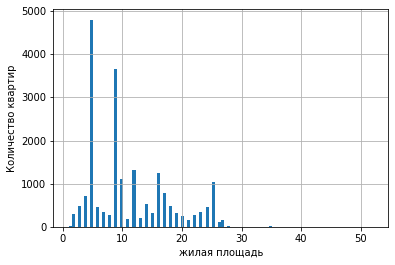

In [97]:
print('Гистограмма')
final_df['floors_total'].hist(bins=100)
plt.xlabel('жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

Больше всего продаются пяти- и девятиэтажки 

Диаграмма размаха


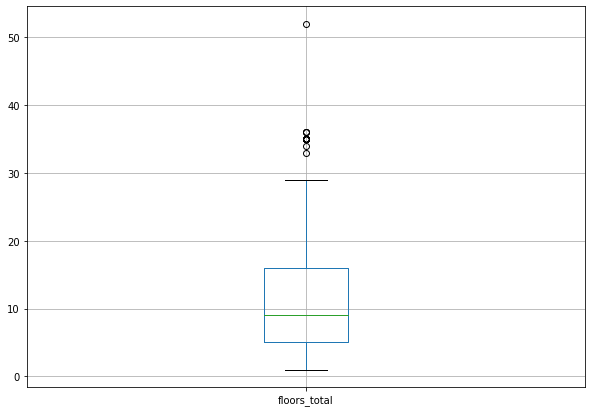

In [98]:
print('Диаграмма размаха')
final_df.boxplot(column=['floors_total'], figsize=(10,7), grid=True)
plt.show()

**Вывод** оставим в датафрейме для дальнейшего анализа недвижимость этажность как есть. Поменяем тип данных на int, так как количесво этажей - целое число.

In [99]:
final_df['floors_total'] = final_df['floors_total'].astype('int')


#### Исследование столбца `cityCenters_nearest` 

In [100]:
#cityCenters_nearest
final_df['cityCenters_nearest'].describe()

count    20353.000000
mean     14722.979413
std       7188.419368
min        318.000000
25%      12047.000000
50%      13093.000000
75%      15643.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Гистограмма


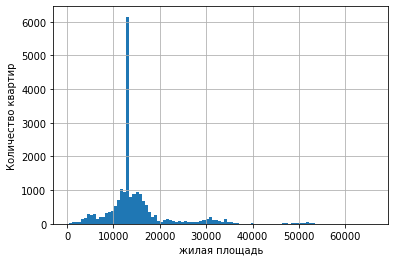

In [101]:
print('Гистограмма')
final_df['cityCenters_nearest'].hist(bins=100)
plt.xlabel('жилая площадь')
plt.ylabel('Количество квартир')
plt.show()

Диаграмма размаха


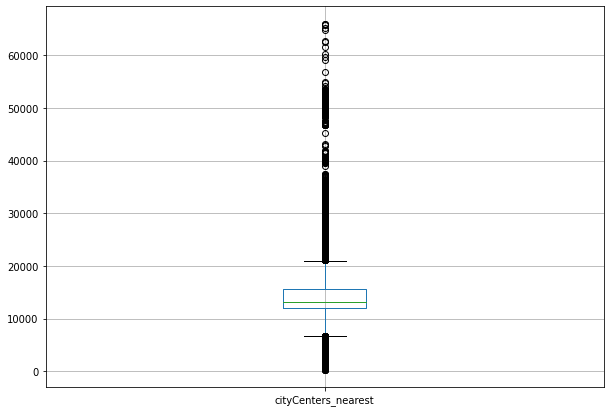

In [102]:
print('Диаграмма размаха')
final_df.boxplot(column=['cityCenters_nearest'], figsize=(10,7), grid=True)
plt.show()

**Вывод** оставим в датафрейме для дальнейшего анализа все как есть

In [103]:
#Переименуем столбец в соответствии со стандартами
final_df = final_df.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'cityCenters_nearest_km':'city_centers_nearest_km'})
final_df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name',
       'airports_nearest', 'city_centers_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',
       'price_per_1m_square', 'week_day_of_exposition', 'month_of_exposition',
       'year_of_exposition', 'floor_type', 'city_centers_nearest_km'],
      dtype='object')

#### Исследование столбца `parks_nearest` 

In [104]:
#parks_nearest
final_df['parks_nearest'].describe()

count    6040.000000
mean      504.887086
std       346.558915
min         1.000000
25%       301.000000
50%       469.000000
75%       628.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Гистограмма


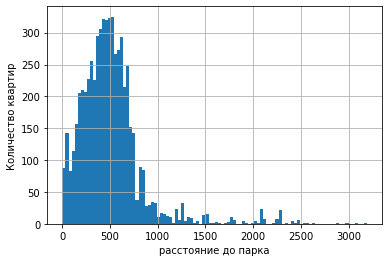

In [105]:
print('Гистограмма')
final_df['parks_nearest'].hist(bins=100)
plt.xlabel('расстояние до парка')
plt.ylabel('Количество квартир')
plt.show()

Диаграмма размаха


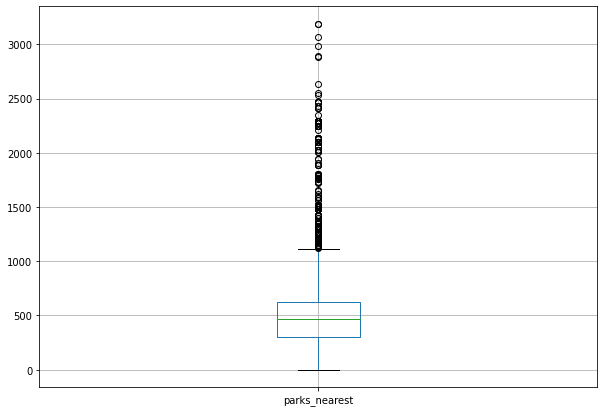

In [106]:
print('Диаграмма размаха')
final_df.boxplot(column=['parks_nearest'], figsize=(10,7), grid=True)
plt.show()

**Вывод** оставим в датафрейме для дальнейшего анализа все как есть

In [107]:
# посмотрим на то, какой у нас датафрейм получился
final_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_1m_square,week_day_of_exposition,month_of_exposition,year_of_exposition,floor_type,city_centers_nearest_km
0,20,13,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,95,120370.37,3,3,2019,другой,16
1,7,3,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81,82920.79,1,12,2018,первый,19
2,10,5,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,92785.71,3,8,2015,другой,14
5,10,2,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,0,NaN,55,95065.79,0,9,2018,другой,13
6,6,3,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,NaN,0,NaN,155,99195.71,3,11,2017,другой,19


In [108]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20353 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             20353 non-null  int64         
 1   last_price               20353 non-null  int64         
 2   total_area               20353 non-null  float64       
 3   first_day_exposition     20353 non-null  datetime64[ns]
 4   rooms                    20353 non-null  int64         
 5   ceiling_height           20353 non-null  float64       
 6   floors_total             20353 non-null  int64         
 7   living_area              20353 non-null  float64       
 8   floor                    20353 non-null  int64         
 9   studio                   20353 non-null  bool          
 10  open_plan                20353 non-null  bool          
 11  kitchen_area             20353 non-null  float64       
 12  balcony                  20353 n

**Вывод:** 27 колонок и 20353 строк - датафрейм немного сократился после удаления аномальных и редких значений.

#### Изучим, как быстро продавались квартиры (столбец `days_exposition`)

In [109]:
print(final_df['days_exposition'].describe())

count    20353.000000
mean       162.218985
std        198.181979
min          1.000000
25%         45.000000
50%         95.000000
75%        190.000000
max       1580.000000
Name: days_exposition, dtype: float64


Гистограмма


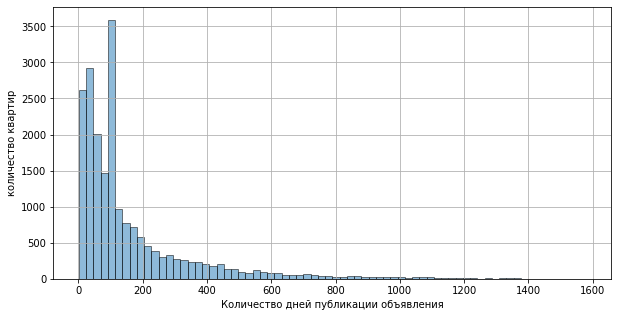

In [110]:
print('Гистограмма')
final_df['days_exposition'].hist(bins=70, figsize=(10,5), ec='black', alpha=0.5)
plt.ylabel('количество квартир')
plt.xlabel('Количество дней публикации объявления')
plt.show()

Диаграмма размаха


<AxesSubplot:>

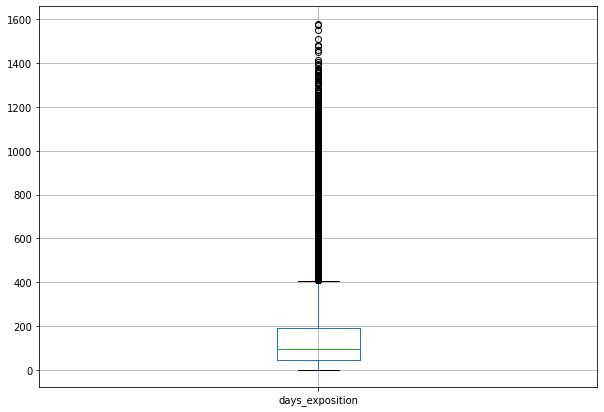

In [111]:
print('Диаграмма размаха')
final_df.boxplot(column=['days_exposition'], figsize=(10,7), grid=True)

In [112]:
df_exp = final_df.pivot_table(index='rooms', values='days_exposition', aggfunc=['mean', 'median', 'count'])
df_exp.columns=['mean', 'median', 'count']
df_exp

,mean,median,count
rooms,,,
0,110.137363,57,182
1,151.871967,95,7584
2,158.630540,95,6994
3,178.717153,95,4734
4,205.646341,97,738
5,187.405660,95,106
6,186.500000,95,12
7,140.666667,150,3


**Вывод:** На гисторграмме видно, что в данных по столбцу `days_exposition` имеется очень сильный скос в право,  из-за чего сдредняя в два раза выше медианы (средняя = 162 дней, медиана = 95 дней). Видно, чтобыстрее всего продаются  1, 2, 3-х комнатные квартиры (за 95 дней) и квартиры с количеством комнат 0, предположительно, это студии. Студии продаются быстрее всего - за 56 дней. Самый худший результат мы видим у недвижимости с 7 комнатами - она продавалась 150 дней.
Так отметим, что на рынке продается больше всего 1, 2 , 3-х комнатные квартиры. 

Рассмотрим ближе распределение дней сколько было размещено объявление

<AxesSubplot:>

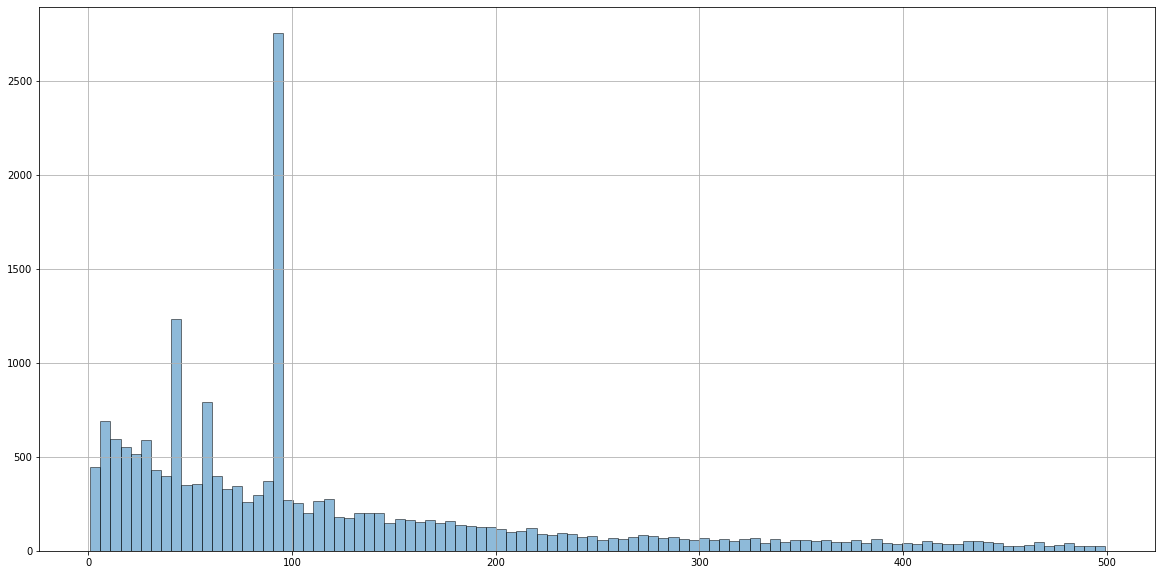

In [113]:
final_df.query('days_exposition < 500')['days_exposition'].hist(bins=100, figsize=(20,10), ec='black', alpha=0.5)

<div class="alert alert-info">
<b>Вывод:</b> Среднее время продажи недвижимости - 162 дня. Медианное время продажи - 95 дней. 
В основном квартиры продаются за 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Видно, что есть 3 пика, когда объявления закрывались чаще всего - это 45 дней, 60 дней и 95 дней. Возможно это связано с тем. что система сама снимает объявления и их необходимо обновить.
Быстрой продажей можно назвать срок до 45 дней. Долгой продажей - свыше 400 дней.
</div>

#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.

Сначала построим матрицу корреляции для всех параметров, а затем рассмотрим влияние каждого параметра на цену.

In [114]:
df_corr = final_df[['last_price', 'total_area', 'kitchen_area', 'rooms', 'floor', 'week_day_of_exposition', 'month_of_exposition', 'year_of_exposition']]\
.reset_index(drop=True)
df_corr.corr()

,last_price,total_area,kitchen_area,rooms,floor,week_day_of_exposition,month_of_exposition,year_of_exposition
last_price,1.000000,0.720609,0.426381,0.417801,0.127123,-0.004634,0.013574,-0.037226
total_area,0.720609,1.000000,0.443870,0.781564,0.023587,-0.001590,0.018550,-0.077000
kitchen_area,0.426381,0.443870,1.000000,0.146141,0.151426,0.012476,0.000543,-0.025875
rooms,0.417801,0.781564,0.146141,1.000000,-0.139729,0.002387,0.003247,-0.041753
floor,0.127123,0.023587,0.151426,-0.139729,1.000000,0.008566,0.021490,0.003688
week_day_of_exposition,-0.004634,-0.001590,0.012476,0.002387,0.008566,1.000000,0.015289,-0.002292
month_of_exposition,0.013574,0.018550,0.000543,0.003247,0.021490,0.015289,1.000000,-0.269846
year_of_exposition,-0.037226,-0.077000,-0.025875,-0.041753,0.003688,-0.002292,-0.269846,1.000000


**Вывод:** Видно, что наибольшее влияние на цену оказывают блощади недвижимости и количество комнат. Рассмотрим влияние каждого параметра на цену подробнее.

##### Изучим, зависит ли цена от общей площади

In [115]:
df_total_square = final_df.pivot_table(index='total_area', values='last_price')\
.sort_values(by='last_price', ascending=True).reset_index()


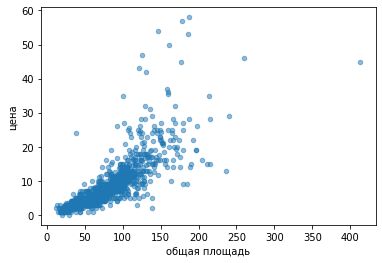

In [116]:
df_total_square.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5) 
plt.ylabel('цена')
plt.xlabel('общая площадь')
plt.show()

In [117]:
# посчитаем коэффмцмент корреляции 
df_total_square['total_area'].corr(df_total_square['last_price'])

0.8217794010820617

**Вывод:** Коэффициент корреляции один из самых высоких 0.82. на графике видно, что прямая зхависимость цены от квадратных метров общей площади.


##### Изучим, зависит ли цена от жилой площади

In [118]:
df_living_square = final_df.pivot_table(index='living_area', values='last_price')\
.sort_values(by='last_price', ascending=True).reset_index()

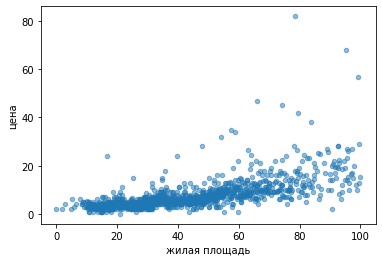

In [119]:
df_living_square.plot(x='living_area', y='last_price', kind='scatter', alpha=0.5) 
plt.ylabel('цена')
plt.xlabel('жилая площадь')
plt.show()

In [120]:
# посчитаем коэффмцмент корреляции 
df_living_square['living_area'].corr(df_living_square['last_price'])

0.6779671534218207

**Вывод:** Размера жилой площади оказывает еще болшее влияние на цену недвижимости. Коэффициент корреляции один из самых высоких 0.67. На графике видно, что прямая зависимость цены от квадратных метров жилой площади.

**Вывод:**

##### Изучим, зависит ли цена от площади кухни

In [121]:
df_kitchen_area = final_df.pivot_table(index='kitchen_area', values='last_price')\
.sort_values(by='last_price', ascending=True).reset_index()

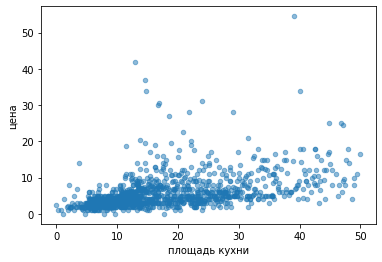

In [122]:
df_kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5) 
plt.ylabel('цена')
plt.xlabel('площадь кухни')
plt.show()

In [123]:
# посчитаем коэффмцмент корреляции 
df_kitchen_area['kitchen_area'].corr(df_kitchen_area['last_price'])

0.4575746552161997

**Вывод:** С кухней дела обстоят так же как и с остальной площадью. Размер площади кухни прямое влияние на цену недвижимости. Коэффициент корреляции 0.45. На графике видно, что прямая зависимость цены от квадратных метров кухни.

##### Изучим, зависит ли цена от количества комнат

In [124]:
df_rooms = final_df.pivot_table(index='rooms', values='last_price')\
.sort_values(by='last_price', ascending=True).reset_index()

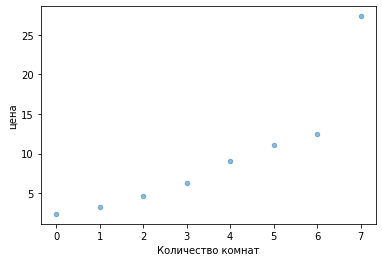

In [125]:
df_rooms.plot(x='rooms', y='last_price', kind='scatter', alpha=0.5) 
plt.ylabel('цена')
plt.xlabel('Количество комнат')
plt.show()

In [126]:
# посчитаем коэффмцмент корреляции 
df_rooms['rooms'].corr(df_rooms['last_price'])

0.8808280537146927

**Вывод:** Количество комнат так же оказывает одно из самых сильных влияний на стоимость жилья ( коэффициент корреляции 0.88). На графике видно, что прямая зависимость цены от квадратных метров кухни. 

##### Изучим, зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой)

In [127]:
df_floor_type = final_df.pivot_table(index='floor_type', values='last_price')\
.sort_values(by='last_price', ascending=True).reset_index()

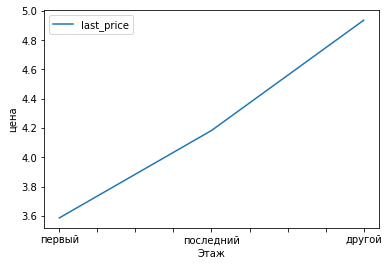

In [128]:
df_floor_type.plot(x='floor_type', y='last_price', kind='line') 
plt.ylabel('цена')
plt.xlabel('Этаж')
plt.show()

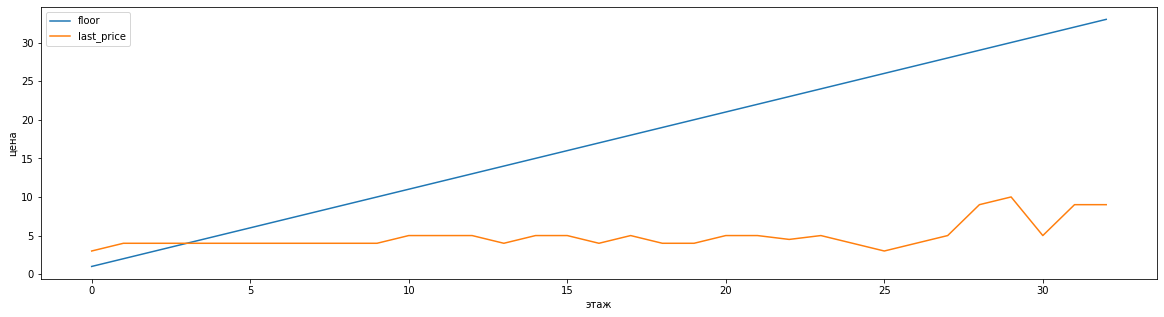

In [129]:
final_df.pivot_table(index='floor', values='last_price', aggfunc='median')\
.sort_values(by='floor', ascending=True).reset_index().plot(kind='line', figsize=(20,5))
plt.ylabel('цена')
plt.xlabel('этаж')
plt.show()

**Вывод:** Видно, что на первом этаже самые дешевые квартиры, последние этаже тоже не самые популярные, но цены на них все же выше, чем на первые. На остальные этажи цена плюс/ минус одинаковая. Есть скоцок цены с 25 по 29 этаж, видимо, это в каких-то новых высотках (30 этож похож на последний).

##### Изучим, зависит ли цена от даты размещения (день недели, месяц, год)

###### От дня недели

In [130]:
df_day = final_df.pivot_table(index='week_day_of_exposition', values='last_price', aggfunc='mean')\
.reset_index()

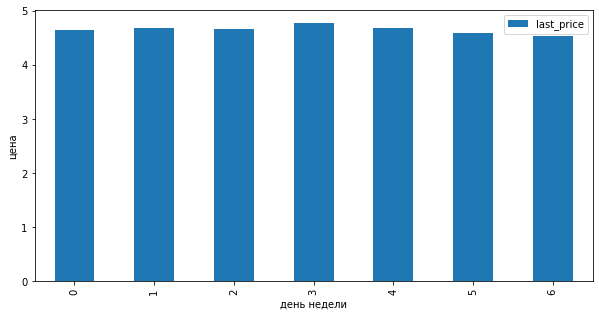

In [131]:
df_day.plot(x='week_day_of_exposition', y='last_price', kind='bar', figsize=(10, 5)) 
plt.ylabel('цена')
plt.xlabel('день недели')
plt.show()

**Вывод:** Видно, что сильной зависимости от дня недели нет

###### От месяца

In [132]:
df_month = final_df.pivot_table(index='month_of_exposition', values='last_price', aggfunc='mean')\
.reset_index()

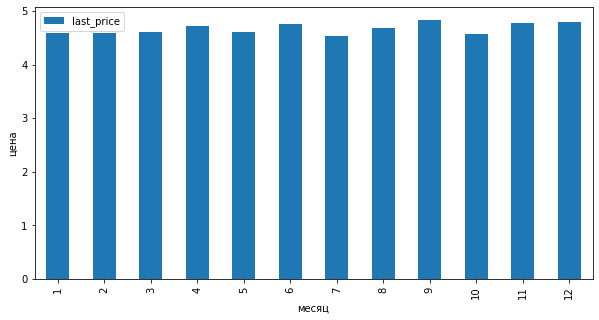

In [133]:
df_month.plot(x='month_of_exposition', y='last_price', kind='bar', figsize=(10, 5)) 
plt.ylabel('цена')
plt.xlabel('месяц')
plt.show()

**Вывод:** Видно, что на конец лета и к новому году цены на недвижимость немного повышаются. Но какого-то сильного влияния месяца нет.

###### От года

In [134]:
df_year = final_df.pivot_table(index='year_of_exposition', values='last_price', aggfunc='median')\
.reset_index()

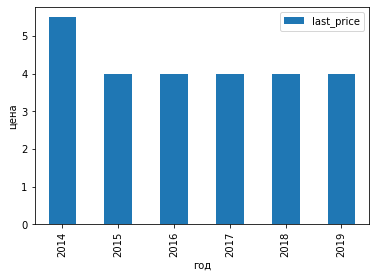

In [135]:
df_year.plot(x='year_of_exposition', y='last_price', kind='bar') 
plt.ylabel('цена')
plt.xlabel('год')
plt.show()

**Вывод:** Видно, что с 2015 по 2019 годы цены на квартиры были стабильны.

#### Посчитайем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [136]:
df_top_10 = data.pivot_table(index='locality_name', values='last_price', aggfunc='count')\
.sort_values(by='last_price', ascending=False).head(10).reset_index()
df_top_10.columns=['locality_name', 'quantity']
top_10 = data.pivot_table(index='locality_name', values='price_per_1m_square', aggfunc=['mean'])
top_10.columns=['mean_price_per_1m_square']
top_10.reset_index()

df_top_10 = df_top_10.join(top_10, on='locality_name', how='left')
df_top_10['mean_price_per_1m_square'].round(0)
df_top_10

,locality_name,quantity,mean_price_per_1m_square
0,Санкт-Петербург,15651,114868.877339
1,поселок Мурино,552,85629.568641
2,поселок Шушары,439,78551.344647
3,Всеволожск,398,68654.473970
4,Пушкин,369,103125.819377
5,Колпино,338,75424.579112
6,поселок Парголово,327,90175.913089
7,Гатчина,307,68746.146515
8,деревня Кудрово,299,92473.547559
9,Выборг,237,58141.909325


In [137]:
print('Максимальная стоимость квадратного метра в г. Санкт-Петербург =', df_top_10['mean_price_per_1m_square'].max().round(2))
print('Минимальная стоимость квадратного метра в Выборг =', df_top_10['mean_price_per_1m_square'].min().round(2))

Максимальная стоимость квадратного метра в г. Санкт-Петербург = 114868.88
Минимальная стоимость квадратного метра в Выборг = 58141.91


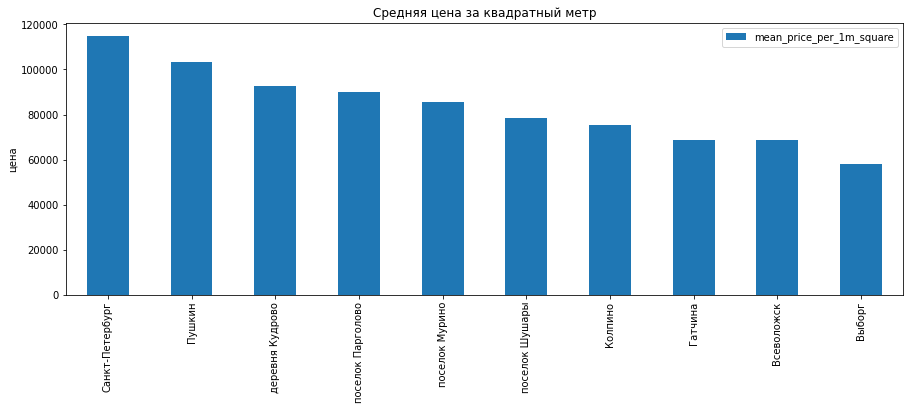

In [138]:
df_top_10.sort_values(by='mean_price_per_1m_square', ascending=False).plot(x='locality_name', \
y='mean_price_per_1m_square', kind='bar',  figsize=(15,5), title='Средняя цена за квадратный метр')
plt.xticks(rotation='vertical')
plt.ylabel('цена')
plt.xlabel('')
plt.show()

**Вывод:** Очевидно, что в самом говорде квадратный метр жилья самый дорогой. На втором месте г. Пушкин.Топ 10 закрывает Выборг.

#### Вычислим среднюю стоимость квартиры в Санкт-Петербурге на разном удалении от центра

In [139]:
df_SPB = data.query('locality_name == "Санкт-Петербург"')\
.sort_values(by='last_price', ascending=True).reset_index()

df_SPB_2 = df_SPB.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')\
.sort_values(by='cityCenters_nearest_km', ascending=True).head(10).reset_index()
df_SPB_2['last_price'] = df_SPB_2['last_price'] / 1000000
df_SPB_2.columns=['city_centers_nearest_km', 'last_price, million RUR']
df_SPB_2

,city_centers_nearest_km,"last_price, million RUR"
0,0,31.449116
1,1,21.206721
2,2,17.788320
3,3,11.137395
4,4,13.304280
5,5,14.455996
6,6,15.338418
7,7,14.775153
8,8,9.949111
9,9,6.956583


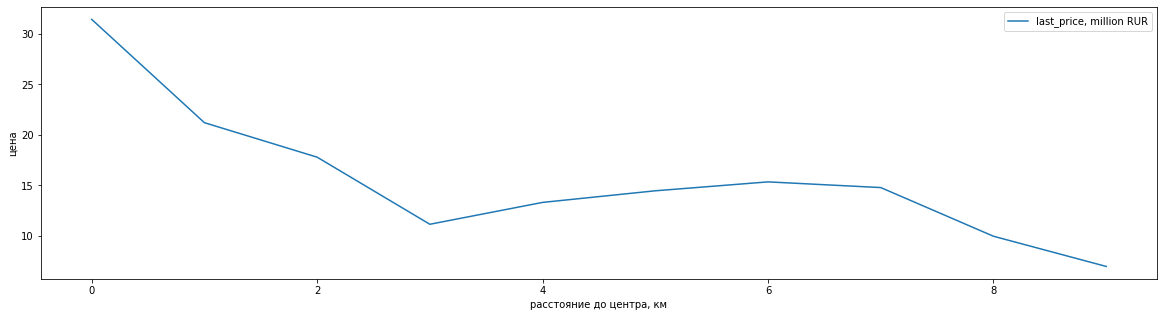

In [140]:
df_SPB_2.plot(x='city_centers_nearest_km', y='last_price, million RUR', kind='line', figsize=(20,5)) 
plt.ylabel('цена')
plt.xlabel('расстояние до центра, км')
plt.show()

In [141]:
df_SPB_corr = df_SPB[['cityCenters_nearest_km', 'last_price', 'total_area', 'rooms', 'floor']]
df_SPB_corr.corr()

,cityCenters_nearest_km,last_price,total_area,rooms,floor
cityCenters_nearest_km,1.000000,-0.257058,-0.333900,-0.291204,0.225411
last_price,-0.257058,1.000000,0.657090,0.372108,-0.000586
total_area,-0.333900,0.657090,1.000000,0.758668,-0.037311
rooms,-0.291204,0.372108,0.758668,1.000000,-0.161592
floor,0.225411,-0.000586,-0.037311,-0.161592,1.000000


**Вывод:** Как и ожидалось, чем ближе к центру, тем дороже стоимость 1 кв.м. недвижимости. Самые дорогие квартиры в центре.

### Общий вывод

В данном исследовании мы проанализировали зависимость стоимости жилья в Санкт-Петербурге и Ленинградской области от различных параметров. Для достижения более высокой доставерности исследования, была произведена чистка данных, а именно: замета пропусков и избавление от выбросов. Некоторые пропуски были заменены медианными значениями, некоторые вообще были удалены из-за слишком маленького количества информации, над некоторыми пропусками была проделана более детальная работа (например, прощади жилья были заменены на медианные значения в зависимости от количества комнат). Анамалии были проанализированы с помощью диаграммы размаха, однако над некоторыми данными так же был произведен более детальный анализ (например высоту потолков некоторых объявлений удалось привести в более реалистичный вариант).

*Проведя анализ мы пришли к следующим выводам:*

- сильное влияние на стоимость жилья оказывает как общая площадь, так и площать кухни и жилая. Так же существенное влияние оказывает количество комнат.
- на первом этаже самые дешевые квартиры, на втором месте последние этажи, однако, цена на срединные этажи растет с увеличением этажности.
- чем ближе к центру города, тем выше стоимость квадратного метра
- нет особой зависимости от того, когда объявление было размещено
- цены на недвижимость немного растут к Новому Году и стабильны с 2016 года
- лидером по размещению объявлений о продаже недвижимости является "Санкт-Петербург"
- больше всего объялений квартир в 9 и 5 этажных домах
- самое сильно влияние на стоимость жилья оказывает количество комнат.
